In [14]:
import networkx as nx 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import io 
import zipfile

In [27]:
import pandas as pd
import networkx as nx

# Đọc ma trận
matrix_file = r"D:/MangXaHoi/gameshow_vietnam/artist_coappearance_matrix1.csv"
df = pd.read_csv(matrix_file, index_col=0, encoding="utf-8-sig")

# Tạo danh sách cạnh từ ma trận
edges = []
for i, artist1 in enumerate(df.index):
    for j, artist2 in enumerate(df.columns):
        if i < j:  # tránh lặp lại và bỏ đường chéo
            weight = df.iloc[i, j]
            if weight > 0:  # chỉ lấy khi có xuất hiện chung
                edges.append((artist1, artist2, weight))

# Tạo graph
G = nx.Graph()
G.add_weighted_edges_from(edges)

print("Số node:", G.number_of_nodes())
print("Số cạnh:", G.number_of_edges())


Số node: 675
Số cạnh: 55262


In [28]:
def calculate_metrics(G):
    metrics = {}

    metrics['Số lượng node'] = G.number_of_nodes()
    metrics['Số lượng edges'] = G.number_of_edges()
    metrics['Mật độ đồ thị'] = nx.density(G)

    degrees = dict(G.degree())
    metrics['Degree trung bình'] = sum(degrees.values()) / len(degrees)
    max_deg_node, max_deg_val = max(degrees.items(), key=lambda x: x[1])
    metrics['Degree lớn nhất'] = max_deg_val
    metrics['Node Degree lớn nhất'] = max_deg_node
    metrics['Degree dict'] = degrees   # lưu lại dict

    # Betweenness
    bc = nx.betweenness_centrality(G)
    metrics['Betweenness Centrality trung bình'] = sum(bc.values()) / len(bc)
    metrics['Betweenness Centrality lớn nhất'], metrics['Node Betweenness lớn nhất'] = max(bc.values()), max(bc, key=bc.get)
    metrics['Betweenness dict'] = bc

    # Closeness
    cc = nx.closeness_centrality(G)
    metrics['Closeness Centrality trung bình'] = sum(cc.values()) / len(cc)
    metrics['Closeness Centrality lớn nhất'], metrics['Node Closeness lớn nhất'] = max(cc.values()), max(cc, key=cc.get)
    metrics['Closeness dict'] = cc

    # PageRank
    pr = nx.pagerank(G)
    metrics['PageRank trung bình'] = sum(pr.values()) / len(pr)
    metrics['PageRank lớn nhất'], metrics['Node PageRank lớn nhất'] = max(pr.values()), max(pr, key=pr.get)
    metrics['PageRank dict'] = pr

    # Clustering
    metrics['Hệ số clustering trung bình'] = nx.average_clustering(G)

    # Connected Components
    metrics['Số lượng thành phần liên thông'] = nx.number_connected_components(G)

    return metrics


# Tính toán các metrics
metrics = calculate_metrics(G)

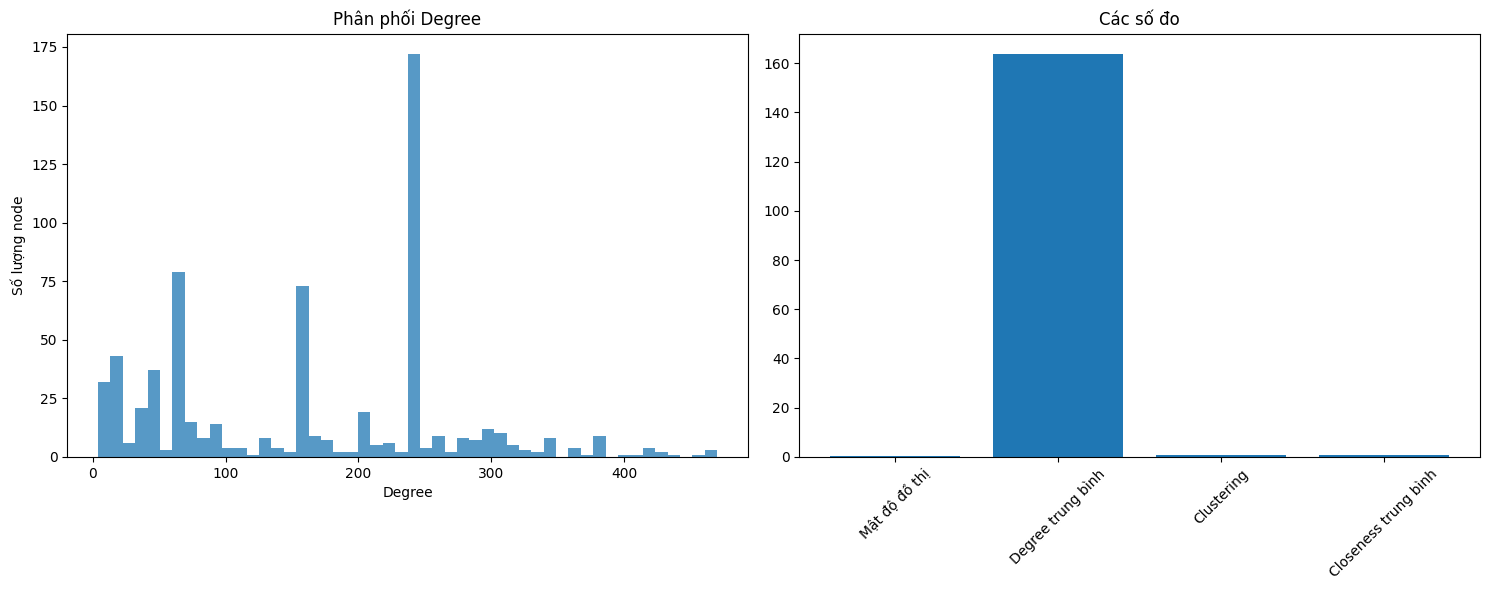

In [29]:
import matplotlib.pyplot as plt

def visualize_results(G, metrics):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

    # Vẽ phân phối degree
    degrees = [d for n, d in G.degree()]
    ax1.hist(degrees, bins = 50, alpha = 0.75)
    ax1.set_title('Phân phối Degree')
    ax1.set_xlabel('Degree')
    ax1.set_ylabel('Số lượng node')

    # Vẽ biểu đồ các metrics
    metrics_to_plot = {
        'Mật độ đồ thị': metrics['Mật độ đồ thị'],
        'Degree trung bình' : metrics['Degree trung bình'],
        'Clustering': metrics['Hệ số clustering trung bình'],
        'Closeness trung bình': metrics['Closeness Centrality trung bình']
    }

    ax2.bar(metrics_to_plot.keys(), metrics_to_plot.values())
    ax2.set_title('Các số đo')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Trực quan hóa kết quả
visualize_results(G, metrics)

In [18]:
print("Keys trong metrics:", metrics.keys())


Keys trong metrics: dict_keys(['Số lượng node', 'Số lượng edges', 'Mật độ đồ thị', 'Degree trung bình', 'Degree lớn nhất', 'Node Degree lớn nhất', 'Degree dict', 'Betweenness Centrality trung bình', 'Betweenness Centrality lớn nhất', 'Node Betweenness lớn nhất', 'Betweenness dict', 'Closeness Centrality trung bình', 'Closeness Centrality lớn nhất', 'Node Closeness lớn nhất', 'Closeness dict', 'PageRank trung bình', 'PageRank lớn nhất', 'Node PageRank lớn nhất', 'PageRank dict', 'Hệ số clustering trung bình', 'Số lượng thành phần liên thông'])


In [30]:
def print_results(metrics):
    print("============ PHÂN TÍCH MẠNG XÃ HỘI ============\n")
    print("1. Thông tin căn bản")
    print(f"- Số lượng nodes (nghệ sĩ): {metrics['Số lượng node']}")
    print(f"- Số lượng cạnh:            {metrics['Số lượng edges']}")
    print(f"- Mật độ đồ thị:            {metrics['Mật độ đồ thị']:.8f}")
    print(f"- Degree trung bình:        {metrics['Degree trung bình']:.4f}")
    print(f"- Degree lớn nhất:          {metrics['Degree lớn nhất']} (Node: {metrics['Node Degree lớn nhất']})\n")

    print("2. Các số đo Centrality")

    print("Betweenness Centrality")
    print(f"- Giá trị lớn nhất:  {metrics['Betweenness Centrality lớn nhất']:.6f} (Node: {metrics['Node Betweenness lớn nhất']})")
    print(f"- Giá trị trung bình:{metrics['Betweenness Centrality trung bình']:.6f}\n")

    print("Closeness Centrality")
    print(f"- Giá trị lớn nhất:  {metrics['Closeness Centrality lớn nhất']:.6f} (Node: {metrics['Node Closeness lớn nhất']})")
    print(f"- Giá trị trung bình:{metrics['Closeness Centrality trung bình']:.6f}\n")

    print("PageRank")
    print(f"- Giá trị lớn nhất:  {metrics['PageRank lớn nhất']:.6f} (Node: {metrics['Node PageRank lớn nhất']})")
    print(f"- Giá trị trung bình:{metrics['PageRank trung bình']:.6f}\n")

    print("Hệ số Clustering")
    print(f"- Giá trị trung bình:{metrics['Hệ số clustering trung bình']:.6f}\n")

    print(f"Số lượng thành phần liên thông: {metrics['Số lượng thành phần liên thông']}")


# Gọi hàm in
print_results(metrics)


============ PHÂN TÍCH MẠNG XÃ HỘI ============

1. Thông tin căn bản
- Số lượng nodes (nghệ sĩ): 675
- Số lượng cạnh:            55262
- Mật độ đồ thị:            0.24293659
- Degree trung bình:        163.7393
- Degree lớn nhất:          470 (Node: Kim Tử Long)

2. Các số đo Centrality
Betweenness Centrality
- Giá trị lớn nhất:  0.030409 (Node: Hòa Minzy)
- Giá trị trung bình:0.001207

Closeness Centrality
- Giá trị lớn nhất:  0.767654 (Node: Kim Tử Long)
- Giá trị trung bình:0.560108

PageRank
- Giá trị lớn nhất:  0.004627 (Node: Kim Tử Long)
- Giá trị trung bình:0.001481

Hệ số Clustering
- Giá trị trung bình:0.890148

Số lượng thành phần liên thông: 1


In [32]:
def get_top_nodes(centrality_dict, k=3):
    return sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:k]

print("\n=== PHÂN TÍCH KẾT QUẢ ===")

print("\nTop 3 Degree Centrality:")
for node, score in get_top_nodes(metrics['Degree dict']):
    print(f"  Node {node}: {score:.3f}")

print("\nTop 3 Betweenness Centrality:")
for node, score in get_top_nodes(metrics['Betweenness dict']):
    print(f"  Node {node}: {score:.3f}")

print("\nTop 3 Closeness Centrality:")
for node, score in get_top_nodes(metrics['Closeness dict']):
    print(f"  Node {node}: {score:.3f}")

print("\nTop 3 PageRank:")
for node, score in get_top_nodes(metrics['PageRank dict']):
    print(f"  Node {node}: {score:.3f}")



=== PHÂN TÍCH KẾT QUẢ ===

Top 3 Degree Centrality:
  Node Kim Tử Long: 470.000
  Node Hòa Minzy: 467.000
  Node Long Nhật: 467.000

Top 3 Betweenness Centrality:
  Node Hòa Minzy: 0.030
  Node Chi Pu: 0.028
  Node Dương Hoàng Yến: 0.023

Top 3 Closeness Centrality:
  Node Kim Tử Long: 0.768
  Node Hòa Minzy: 0.765
  Node Long Nhật: 0.765

Top 3 PageRank:
  Node Kim Tử Long: 0.005
  Node Long Nhật: 0.005
  Node Hồ Quang Hiếu: 0.004


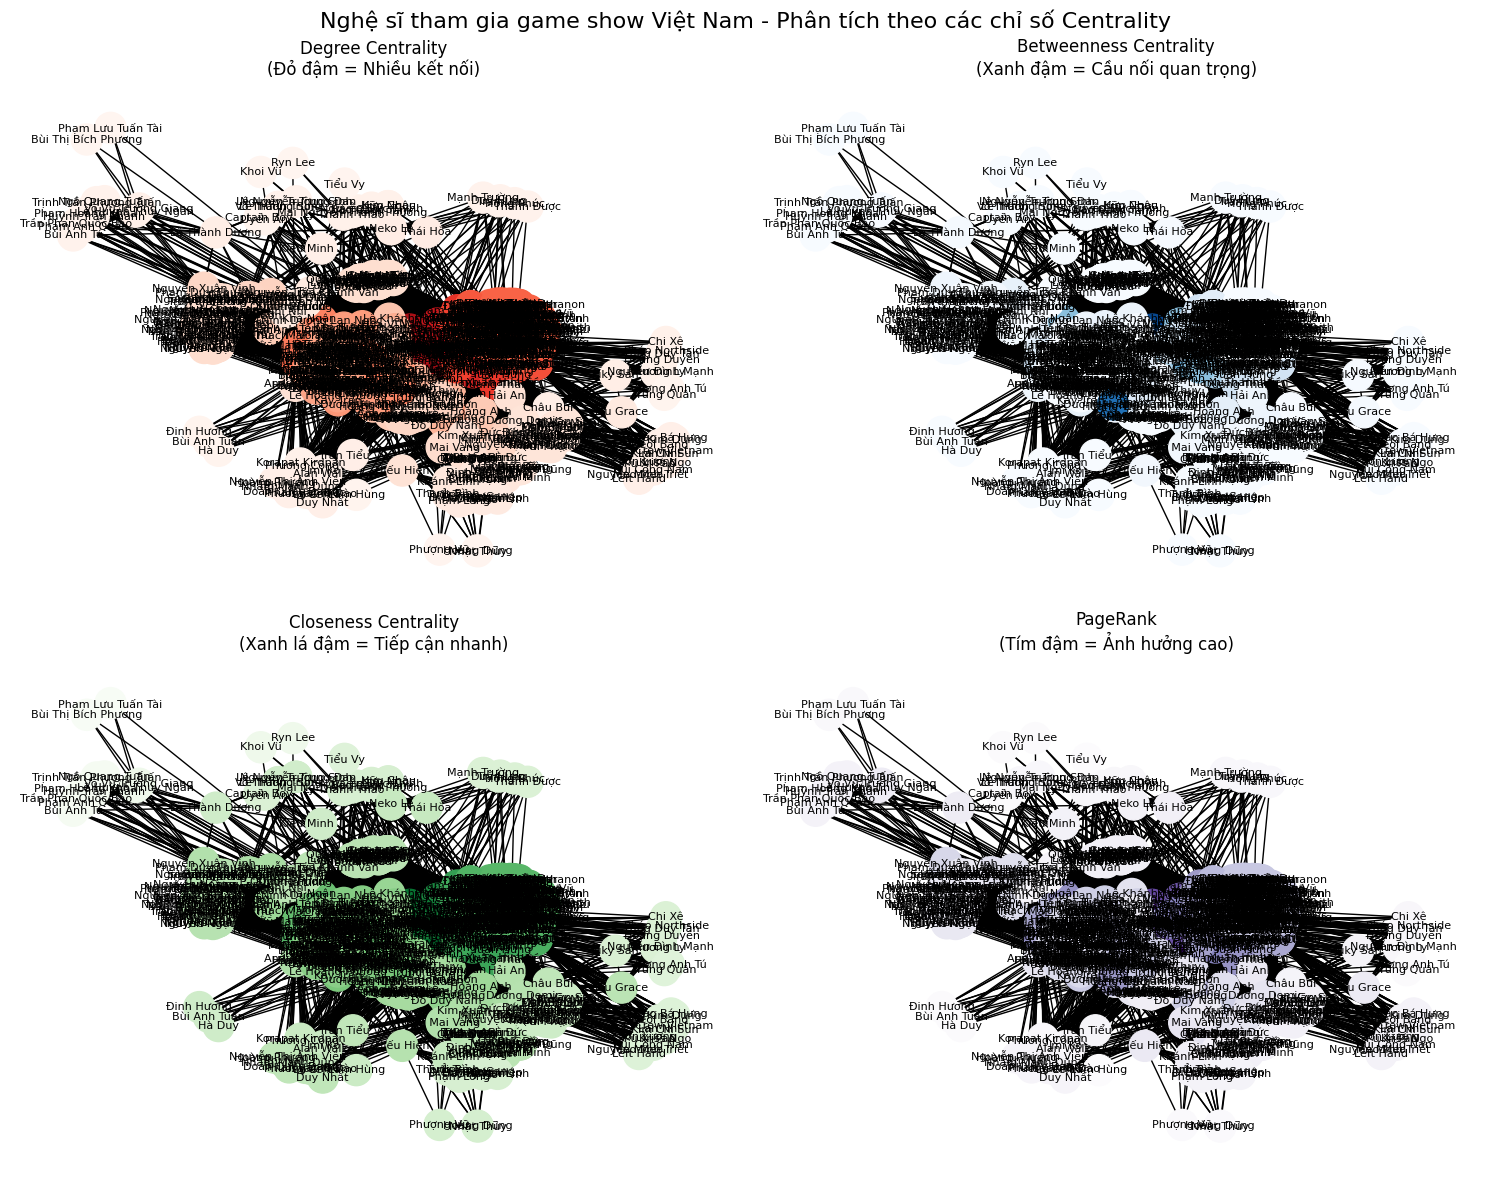

In [33]:
# Lấy các dict từ metrics
deg_dict = metrics['Degree dict']
bc_dict = metrics['Betweenness dict']
cc_dict = metrics['Closeness dict']
pr_dict = metrics['PageRank dict']

# Vẽ 4 biểu đồ khác nhau theo 4 chỉ số
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Nghệ sĩ tham gia game show Việt Nam - Phân tích theo các chỉ số Centrality', fontsize=16)

# Tạo layout cố định để so sánh
pos = nx.spring_layout(G, seed=42)

# 1. Degree Centrality
ax1 = axes[0, 0]
node_colors = [deg_dict[node] for node in G.nodes()]
nx.draw(G, pos, ax=ax1, node_color=node_colors, cmap='Reds',
        node_size=500, with_labels=True, font_size=8)
ax1.set_title('Degree Centrality\n(Đỏ đậm = Nhiều kết nối)')

# 2. Betweenness Centrality
ax2 = axes[0, 1]
node_colors = [bc_dict[node] for node in G.nodes()]
nx.draw(G, pos, ax=ax2, node_color=node_colors, cmap='Blues',
        node_size=500, with_labels=True, font_size=8)
ax2.set_title('Betweenness Centrality\n(Xanh đậm = Cầu nối quan trọng)')

# 3. Closeness Centrality
ax3 = axes[1, 0]
node_colors = [cc_dict[node] for node in G.nodes()]
nx.draw(G, pos, ax=ax3, node_color=node_colors, cmap='Greens',
        node_size=500, with_labels=True, font_size=8)
ax3.set_title('Closeness Centrality\n(Xanh lá đậm = Tiếp cận nhanh)')

# 4. PageRank
ax4 = axes[1, 1]
node_colors = [pr_dict[node] for node in G.nodes()]
nx.draw(G, pos, ax=ax4, node_color=node_colors, cmap='Purples',
        node_size=500, with_labels=True, font_size=8)
ax4.set_title('PageRank\n(Tím đậm = Ảnh hưởng cao)')

plt.tight_layout()
plt.show()


In [34]:
# Lấy các dict từ metrics
deg_dict = metrics['Degree dict']
bc_dict  = metrics['Betweenness dict']
cc_dict  = metrics['Closeness dict']
pr_dict  = metrics['PageRank dict']

# Phân tích node quan trọng nhất theo từng chỉ số
most_important_nodes = {
    'Degree': max(deg_dict, key=deg_dict.get),
    'Betweenness': max(bc_dict, key=bc_dict.get),
    'Closeness': max(cc_dict, key=cc_dict.get),
    'PageRank': max(pr_dict, key=pr_dict.get)
}

print("=== NODE QUAN TRỌNG NHẤT THEO TỪNG CHỈ SỐ ===")
for metric, node in most_important_nodes.items():
    print(f"{metric}: {node}")

# So sánh chi tiết các node quan trọng nhất
print("\n=== SO SÁNH CHI TIẾT CÁC NODE QUAN TRỌNG ===")
for metric, node in most_important_nodes.items():
    print(f"\nNode {node} (theo {metric}):")
    print(f"  Degree Centrality:     {deg_dict[node]:.3f}")
    print(f"  Betweenness Centrality:{bc_dict[node]:.3f}")
    print(f"  Closeness Centrality:  {cc_dict[node]:.3f}")
    print(f"  PageRank:              {pr_dict[node]:.3f}")
    print(f"  Số bạn bè trực tiếp:   {G.degree[node]}")


=== NODE QUAN TRỌNG NHẤT THEO TỪNG CHỈ SỐ ===
Degree: Kim Tử Long
Betweenness: Hòa Minzy
Closeness: Kim Tử Long
PageRank: Kim Tử Long

=== SO SÁNH CHI TIẾT CÁC NODE QUAN TRỌNG ===

Node Kim Tử Long (theo Degree):
  Degree Centrality:     470.000
  Betweenness Centrality:0.015
  Closeness Centrality:  0.768
  PageRank:              0.005
  Số bạn bè trực tiếp:   470

Node Hòa Minzy (theo Betweenness):
  Degree Centrality:     467.000
  Betweenness Centrality:0.030
  Closeness Centrality:  0.765
  PageRank:              0.004
  Số bạn bè trực tiếp:   467

Node Kim Tử Long (theo Closeness):
  Degree Centrality:     470.000
  Betweenness Centrality:0.015
  Closeness Centrality:  0.768
  PageRank:              0.005
  Số bạn bè trực tiếp:   470

Node Kim Tử Long (theo PageRank):
  Degree Centrality:     470.000
  Betweenness Centrality:0.015
  Closeness Centrality:  0.768
  PageRank:              0.005
  Số bạn bè trực tiếp:   470


Đồ thị (từ ma trận) có 675 nút và 55262 cạnh


C:\Users\acer\AppData\Local\Temp\ipykernel_2000\1419700078.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


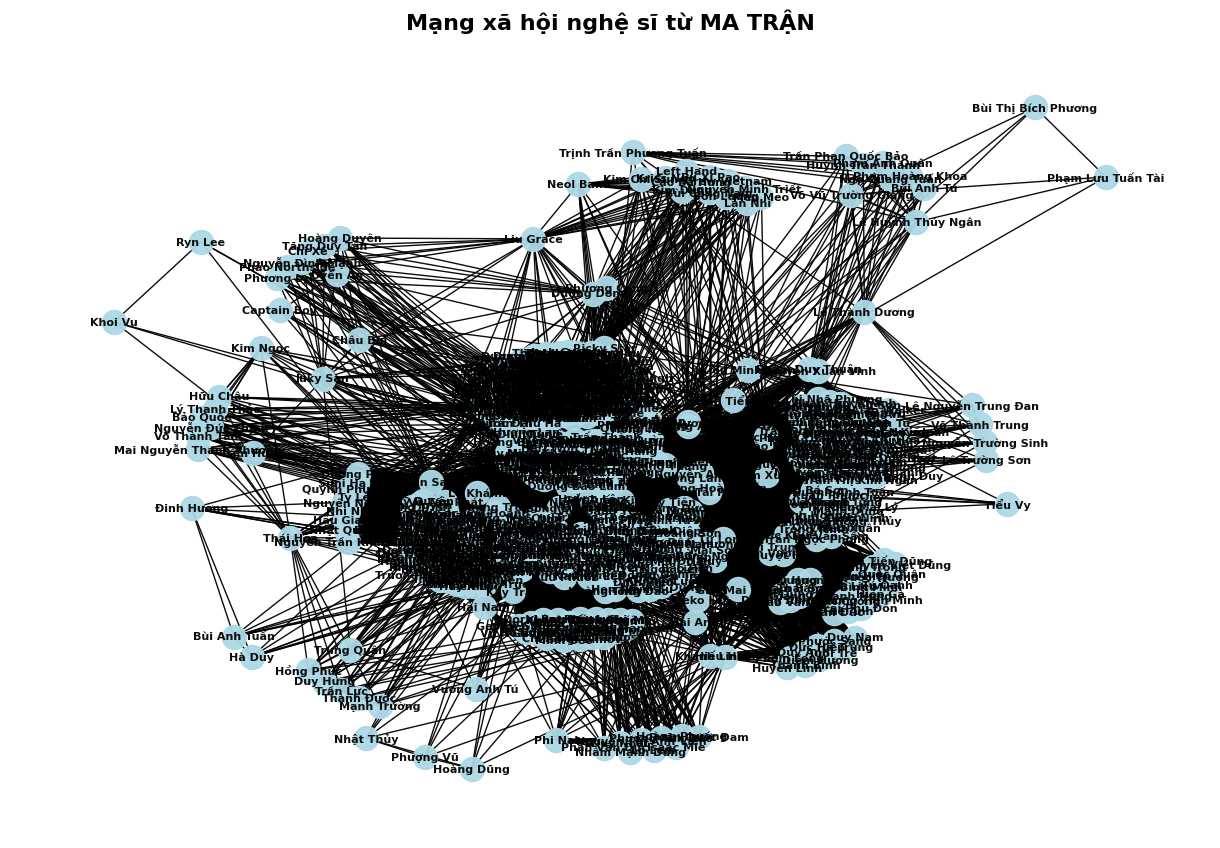


Thống kê cơ bản:
Số nút: 675
Số cạnh: 55262
Mật độ: 0.242937
Độ trung bình: 163.74
Hệ số clustering trung bình: 0.890148


In [35]:
# Đặt tên biến cho rõ (khỏi nhầm với đồ thị mẫu)
G_original = G

print(f"Đồ thị (từ ma trận) có {G_original.number_of_nodes()} nút và {G_original.number_of_edges()} cạnh")

# Visualize đồ thị
plt.figure(figsize=(12, 8))

# Với mạng lớn, nên dùng k nhỏ để đỡ rối (0.15–0.3); seed để cố định layout
pos = nx.spring_layout(G_original, k=0.25, seed=42)

# Nếu muốn kích thước node theo 'strength' (tổng weight các cạnh kề), bạn có thể dùng:
# strength = dict(G_original.degree(weight='weight'))
# node_sizes = [80 + 4*strength[n] for n in G_original.nodes()]
# Còn nếu muốn giữ giống code gốc (kích thước cố định):
node_sizes = 300

# Độ dày cạnh theo trọng số (nếu có)
edge_widths = [0.5 + 0.5*G_original[u][v].get("weight", 1) for u, v in G_original.edges()]

nx.draw(
    G_original, pos,
    node_color='lightblue',
    node_size=node_sizes,
    width=edge_widths,
    with_labels=True, font_size=8, font_weight='bold',
    alpha=0.95
)
plt.title('Mạng xã hội nghệ sĩ từ MA TRẬN', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# Thống kê cơ bản
degrees = [d for _, d in G_original.degree()]
print("\nThống kê cơ bản:")
print(f"Số nút: {G_original.number_of_nodes()}")
print(f"Số cạnh: {G_original.number_of_edges()}")
print(f"Mật độ: {nx.density(G_original):.6f}")
print(f"Độ trung bình: {np.mean(degrees):.2f}")
print(f"Hệ số clustering trung bình: {nx.average_clustering(G_original):.6f}")

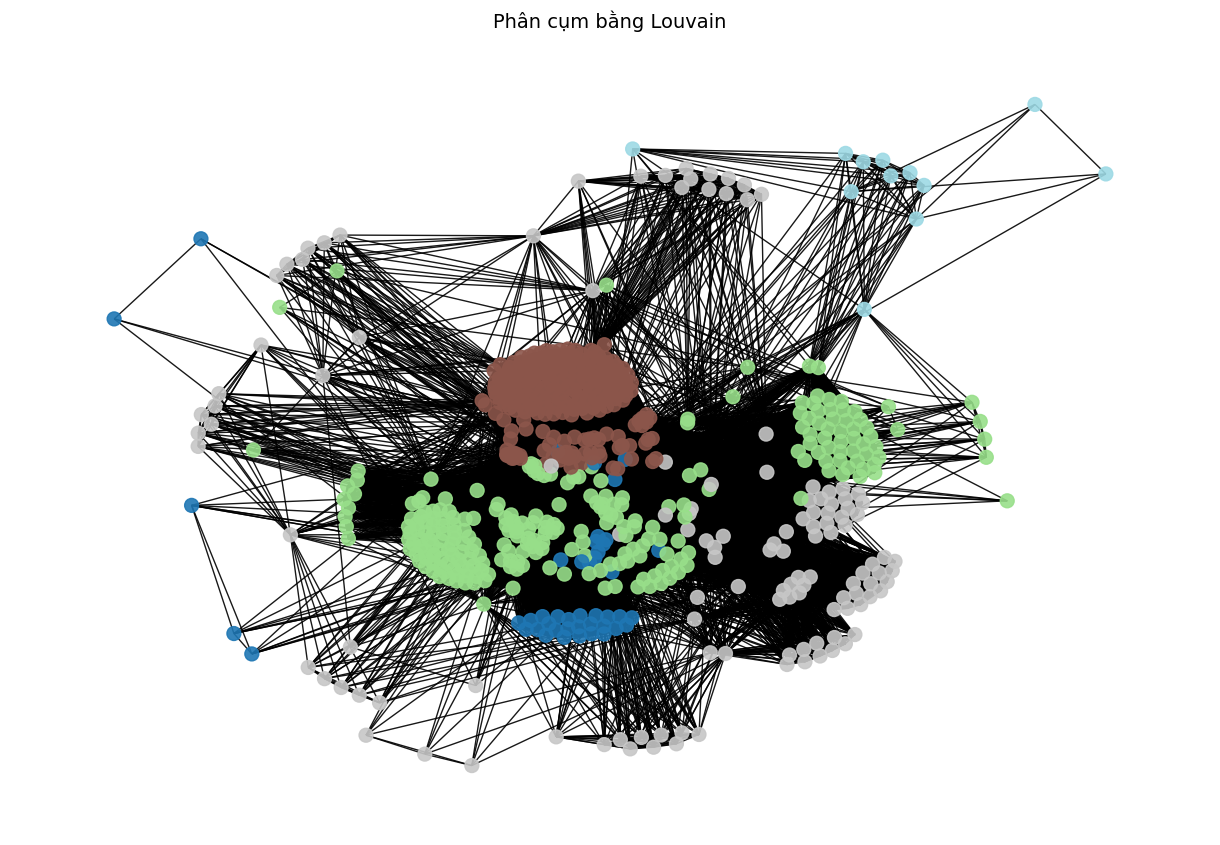

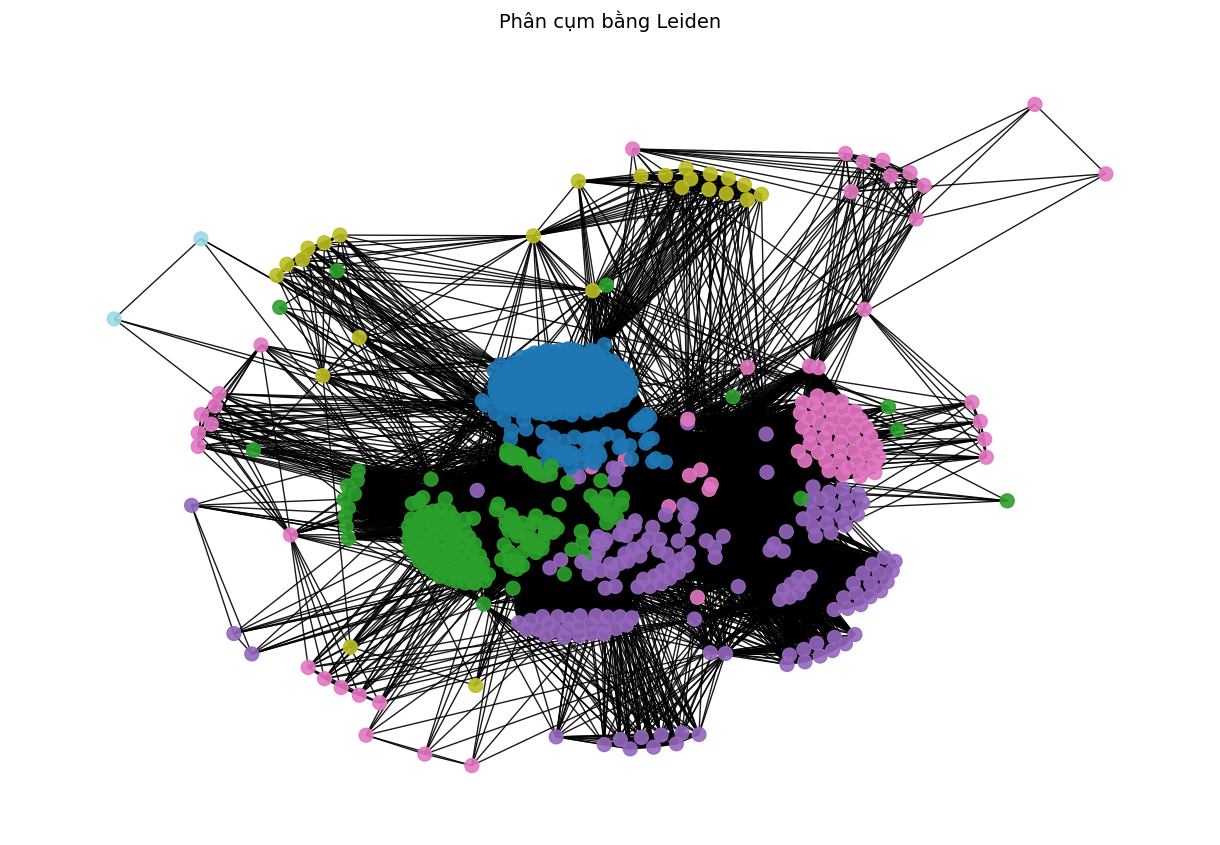

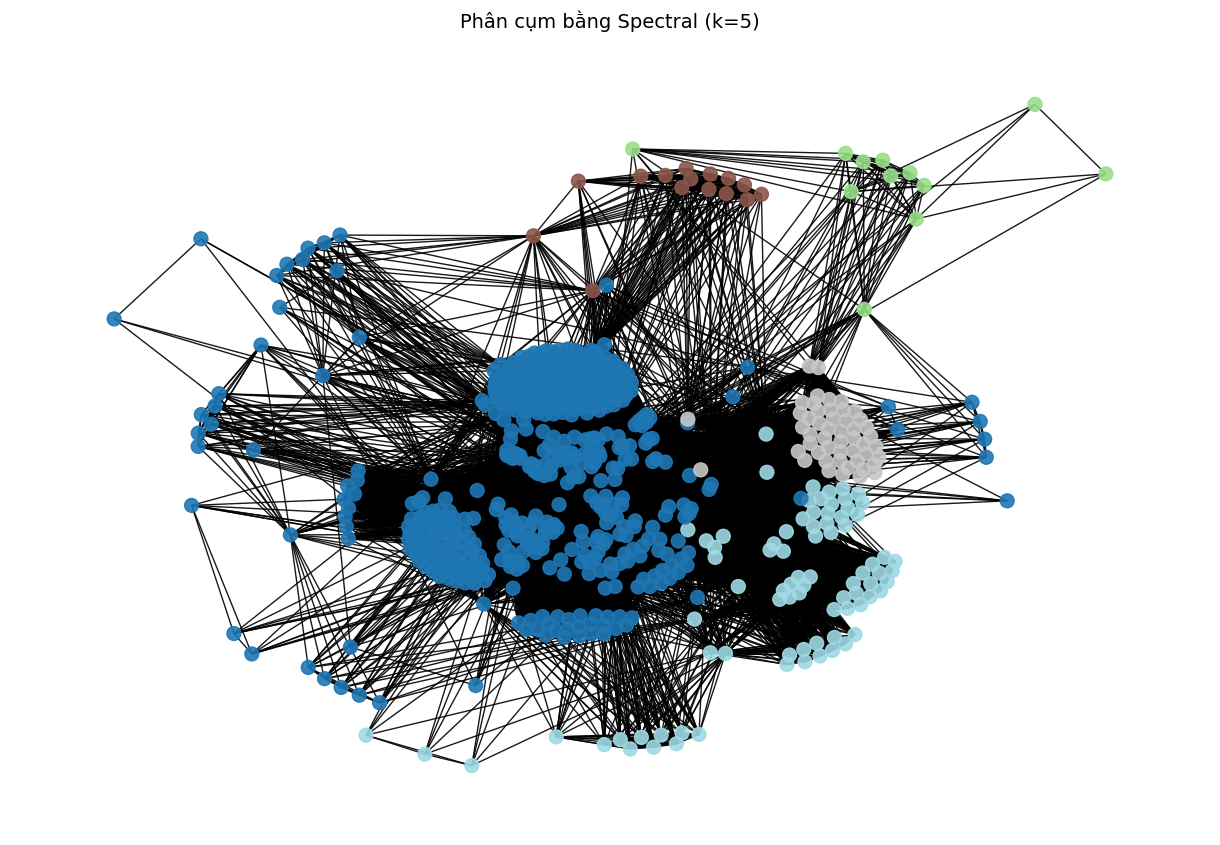


=== SỐ CỤM TÌM ĐƯỢC ===
Louvain: 5 cụm
Leiden: 6 cụm
Spectral (k=5): 5 cụm


In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# ===== 1. Louvain =====
def run_louvain(G):
    from community import community_louvain
    partition = community_louvain.best_partition(G, weight='weight')
    return partition, "Louvain"


# ===== 2. Leiden =====
def run_leiden(G):
    import igraph as ig
    import leidenalg

    # Chuyển từ NetworkX -> igraph
    g = ig.Graph.TupleList(G.edges(data=True), weights=True, directed=False)

    part = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)

    # Mapping node -> community
    partition = {}
    for cid, cluster in enumerate(part):
        for node in cluster:
            partition[g.vs[node]["name"]] = cid
    return partition, "Leiden"


# ===== 3. Spectral Clustering =====
def run_spectral(G, k=5):
    from sklearn.cluster import KMeans
    from sklearn.manifold import spectral_embedding

    A = nx.to_numpy_array(G, weight='weight')
    L_emb = spectral_embedding(A, n_components=k, random_state=42)
    labels = KMeans(n_clusters=k, n_init=20, random_state=42).fit_predict(L_emb)

    partition = {node: labels[i] for i, node in enumerate(G.nodes())}
    return partition, f"Spectral (k={k})"


# ===== Hàm visualize cộng đồng =====
def plot_partition(G, partition, algo):
    if not partition:
        return
    pos = nx.spring_layout(G, seed=42, k=0.25)
    node_colors = [partition[n] for n in G.nodes()]
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos,
        node_color=node_colors, cmap=plt.cm.tab20,
        node_size=100, with_labels=False, alpha=0.9
    )
    plt.title(f"Phân cụm bằng {algo}", fontsize=14)
    plt.axis("off")
    plt.show()


# ===== CHẠY CẢ 3 =====
part_louvain, algo1 = run_louvain(G)
plot_partition(G, part_louvain, algo1)

part_leiden, algo2 = run_leiden(G)
plot_partition(G, part_leiden, algo2)

# chọn k = số cụm Louvain để Spectral dễ so sánh
k = len(set(part_louvain.values())) if part_louvain else 5
part_spec, algo3 = run_spectral(G, k=k)
plot_partition(G, part_spec, algo3)

# ===== In số cụm tìm được =====
print("\n=== SỐ CỤM TÌM ĐƯỢC ===")
print(f"{algo1}: {len(set(part_louvain.values()))} cụm")
print(f"{algo2}: {len(set(part_leiden.values()))} cụm")
print(f"{algo3}: {len(set(part_spec.values()))} cụm")


In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score, normalized_mutual_info_score, adjusted_rand_score
from sklearn.manifold import spectral_embedding
import numpy as np

def clustering_stats(G, partition, algo, ground_truth=None):
    clusters = {}
    for node, cid in partition.items():
        clusters.setdefault(cid, []).append(node)

    sizes = [len(members) for members in clusters.values()]
    num_comms = len(clusters)

    # Modularity
    modularity = nx.algorithms.community.quality.modularity(
        G, [set(members) for members in clusters.values()], weight="weight"
    )

    # Silhouette
    try:
        A = nx.to_numpy_array(G, weight="weight")
        emb = spectral_embedding(A, n_components=min(10, len(G)-1), random_state=42)
        labels = np.array([partition[n] for n in G.nodes()])
        silhouette = silhouette_score(emb, labels) if len(set(labels)) > 1 else np.nan
    except:
        silhouette = np.nan


    return {
        "Thuật toán": algo,
        "Số cụm": num_comms,
        "Kích thước TB": round(sum(sizes) / num_comms, 2),
        "Cụm nhỏ nhất": min(sizes),
        "Cụm lớn nhất": max(sizes),
        "Modularity": round(modularity, 4),
        "Silhouette": round(silhouette, 4) if silhouette == silhouette else "NaN",
    }


# === Tính cho 3 thuật toán ===
stats_louvain  = clustering_stats(G, part_louvain, "Louvain", ground_truth)
stats_leiden   = clustering_stats(G, part_leiden,  "Leiden", ground_truth)
stats_spectral = clustering_stats(G, part_spec,    "Spectral", ground_truth)


# Gom lại thành DataFrame
df_stats = pd.DataFrame([stats_louvain, stats_leiden, stats_spectral])
print("\n=== SO SÁNH THÔNG SỐ 3 THUẬT TOÁN ===")
print(df_stats.to_string(index=False))



=== SO SÁNH THÔNG SỐ 3 THUẬT TOÁN ===
Thuật toán  Số cụm  Kích thước TB  Cụm nhỏ nhất  Cụm lớn nhất  Modularity  Silhouette
   Louvain       5          135.0            12           259      0.3682      0.2484
    Leiden       6          112.5             2           223      0.3784      0.2456
  Spectral       5          135.0            12           516      0.0867      0.4131


In [42]:
# ===== HÀM IN DANH SÁCH NGHỆ SĨ THEO CỤM =====
def print_clusters(partition, algo, top_n=None):
    clusters = {}
    for node, cid in partition.items():
        clusters.setdefault(cid, []).append(node)

    print(f"\n=== CỘNG ĐỒNG THEO {algo} ===")
    for cid, members in clusters.items():
        if top_n:  # chỉ in top N
            print(f"Cụm {cid} ({len(members)} nghệ sĩ): {', '.join(members[:top_n])} ...")
        else:      # in toàn bộ
            print(f"Cụm {cid} ({len(members)} nghệ sĩ): {', '.join(members)}")


# ===== IN RA KẾT QUẢ =====
print_clusters(part_louvain, algo1, top_n=10)  # in top 10 mỗi cụm Louvain
print_clusters(part_leiden, algo2, top_n=10)   # in top 10 mỗi cụm Leiden
print_clusters(part_spec, algo3, top_n=10)     # in top 10 mỗi cụm Spectral



=== CỘNG ĐỒNG THEO Louvain ===
Cụm 0 (45 nghệ sĩ): Angela Phương Trinh, Bảo Anh, Chi Pu, Chí Anh, Chí Tài, Dorbi Petrov, George Ganev, Georgi Dimov, Georgi Ganev, Hoàng My ...
Cụm 1 (259 nghệ sĩ): Anh Thư, Anh Đức, Cris Phan, Diệu Nhi, Don Nguyễn, Duy Khánh, Hen Niê, Hoàng Thùy, Hoàng Yến Chibi, Huỳnh Lập ...
Cụm 2 (231 nghệ sĩ): Cát Phượng, Hari Won, Hoài Linh, Hồ Quỳnh Hương, Khởi My, Lam Trường, Minh Khang, Minh Nhí, Miu Lê, Ngô Thanh Vân ...
Cụm 3 (128 nghệ sĩ): Hoàng Sơn, Lý Hùng, Mai Sơn, Phượng Loan, Thanh Thủy, Tự Long, Việt Hương, Đỗ Duy Nam, Bạch Long, Quang Thắng ...
Cụm 4 (12 nghệ sĩ): Lê Thành Dương, Bùi Anh Tú, Huỳnh Trấn Thành, Lê Huỳnh Thúy Ngân, Ngô Quang Tuấn, Phạm Anh Quân, Phạm Hoàng Khoa, Trần Phan Quốc Bảo, Trịnh Trần Phương Tuấn, Võ Vũ Trường Giang ...

=== CỘNG ĐỒNG THEO Leiden ===
Cụm 0 (223 nghệ sĩ): Bảo Anh, Hari Won, Hoài Linh, Hồ Quỳnh Hương, Khởi My, Lam Trường, Minh Khang, Minh Nhí, Miu Lê, Ngô Kiến Huy ...
Cụm 1 (171 nghệ sĩ): Anh Thư, Anh Đức, Cris Pha

In [ ]:
def most_frequent_collab_group(G, partition, algo):
    clusters = {}
    for node, cid in partition.items():
        clusters.setdefault(cid, []).append(node)

    intra_weights = {}
    for cid, members in clusters.items():
        subg = G.subgraph(members)
        total_weight = sum(d["weight"] for _,_,d in subg.edges(data=True))
        intra_weights[cid] = total_weight

    # Tổng số cạnh (có trọng số) toàn mạng
    total_graph_weight = sum(d["weight"] for _,_,d in G.edges(data=True))

    # Cụm hợp tác mạnh nhất
    best_cid = max(intra_weights, key=intra_weights.get)
    best_members = clusters[best_cid]

    best_val = intra_weights[best_cid]
    perc = best_val / total_graph_weight * 100 if total_graph_weight > 0 else 0

    print(f"\n=== NHÓM HỢP TÁC THƯỜNG XUYÊN NHẤT ({algo}) ===")
    print(f"- Cụm {best_cid} với {len(best_members)} nghệ sĩ")
    print(f"- Tổng số lần hợp tác nội bộ: {best_val} "
          f"trên {total_graph_weight} cạnh toàn mạng (≈ {perc:.2f}%)")
    print(f"- Danh sách nghệ sĩ: {', '.join(best_members)}")



    
most_frequent_collab_group(G, part_louvain, "Louvain")
most_frequent_collab_group(G, part_leiden,  "Leiden")
most_frequent_collab_group(G, part_spec,    "Spectral")



=== NHÓM HỢP TÁC THƯỜNG XUYÊN NHẤT (Louvain) ===
- Cụm 2 với 231 nghệ sĩ
- Tổng số lần hợp tác nội bộ: 26984 trên 58843 cạnh toàn mạng (≈ 45.86%)
- Danh sách nghệ sĩ: Cát Phượng, Hari Won, Hoài Linh, Hồ Quỳnh Hương, Khởi My, Lam Trường, Minh Khang, Minh Nhí, Miu Lê, Ngô Thanh Vân, Ngọc Giàu, Ngọc Huyền, Noo Phước Thịnh, Phan Mạnh Quỳnh, Phi Nhung, Phương Thanh, Phạm Anh Khoa, Siu Black, Thanh Bạch, Thanh Hằng, Thanh Kim Huệ, Thu Minh, Trúc Nhân, Trường Giang, Trấn Thành, Trần Tiến, Uyên Linh, Vũ Cát Tường, Xuân Lan, Yến Trang, Đông Nhi, Đức Huy, Anh Khang, Ariana Grande, Ayumi Hamasaki, Backstreet Boys, Bi Rain, Bon Jovi, Britney Spears, Bryan Adams, Bích Phương, Bùi Lan Hương, Bảo Thy, Bảo Yến, Bằng Kiều, Camila Cabello, Carl Douglas, Cee Lo Green, Charlie Chaplin, China Dolls, Christina Aguilera, Chubby Checker, Châu Kiệt Luân, Chế Linh, Conchita Wurst, Cung Lâm Na, Céline Dion, Cẩm Ly, Declan Galbraith, Diana Damrau, Diana Ross, Diệu Hiền, Donna Summer, Duy Mạnh, Dương Ngọc Thái, D

In [48]:
def print_results(metrics):
    print("============ PHÂN TÍCH MẠNG XÃ HỘI ============\n")
    print("1. Thông tin căn bản")
    print(f"- Số lượng nodes (nghệ sĩ): {metrics['Số lượng node']}")
    print(f"- Số lượng cạnh:            {metrics['Số lượng edges']}")
    print(f"- Mật độ đồ thị:            {metrics['Mật độ đồ thị']:.8f}")
    print(f"- Degree trung bình:        {metrics['Degree trung bình']:.4f}")
    print(f"- Degree lớn nhất:          {metrics['Degree lớn nhất']} (Node: {metrics['Node Degree lớn nhất']})\n")

    print("2. Các số đo Centrality")

    print("Betweenness Centrality")
    print(f"- Giá trị lớn nhất:  {metrics['Betweenness Centrality lớn nhất']:.6f} (Node: {metrics['Node Betweenness lớn nhất']})")
    print(f"- Giá trị trung bình:{metrics['Betweenness Centrality trung bình']:.6f}\n")

    print("Closeness Centrality")
    print(f"- Giá trị lớn nhất:  {metrics['Closeness Centrality lớn nhất']:.6f} (Node: {metrics['Node Closeness lớn nhất']})")
    print(f"- Giá trị trung bình:{metrics['Closeness Centrality trung bình']:.6f}\n")

    print("PageRank")
    print(f"- Giá trị lớn nhất:  {metrics['PageRank lớn nhất']:.6f} (Node: {metrics['Node PageRank lớn nhất']})")
    print(f"- Giá trị trung bình:{metrics['PageRank trung bình']:.6f}\n")

    print("Hệ số Clustering")
    print(f"- Giá trị trung bình:{metrics['Hệ số clustering trung bình']:.6f}\n")

    print(f"Số lượng thành phần liên thông: {metrics['Số lượng thành phần liên thông']}")


# Gọi hàm in
print_results(metrics)


============ PHÂN TÍCH MẠNG XÃ HỘI ============

1. Thông tin căn bản
- Số lượng nodes (nghệ sĩ): 675
- Số lượng cạnh:            55262
- Mật độ đồ thị:            0.24293659
- Degree trung bình:        163.7393
- Degree lớn nhất:          470 (Node: Kim Tử Long)

2. Các số đo Centrality
Betweenness Centrality
- Giá trị lớn nhất:  0.030409 (Node: Hòa Minzy)
- Giá trị trung bình:0.001207

Closeness Centrality
- Giá trị lớn nhất:  0.767654 (Node: Kim Tử Long)
- Giá trị trung bình:0.560108

PageRank
- Giá trị lớn nhất:  0.004627 (Node: Kim Tử Long)
- Giá trị trung bình:0.001481

Hệ số Clustering
- Giá trị trung bình:0.890148

Số lượng thành phần liên thông: 1


KẾT QUẢ ĐÁNH GIÁ GMM TRÊN ĐỒ THỊ G
   ▪ Thuật toán     : GMM
   ▪ Số cụm          : 5
   ▪ Kích thước TB   : 135.00
   ▪ Cụm nhỏ nhất    : 46
   ▪ Cụm lớn nhất    : 247
   ▪ Modularity      : 0.3483
   ▪ Silhouette      : 0.3894


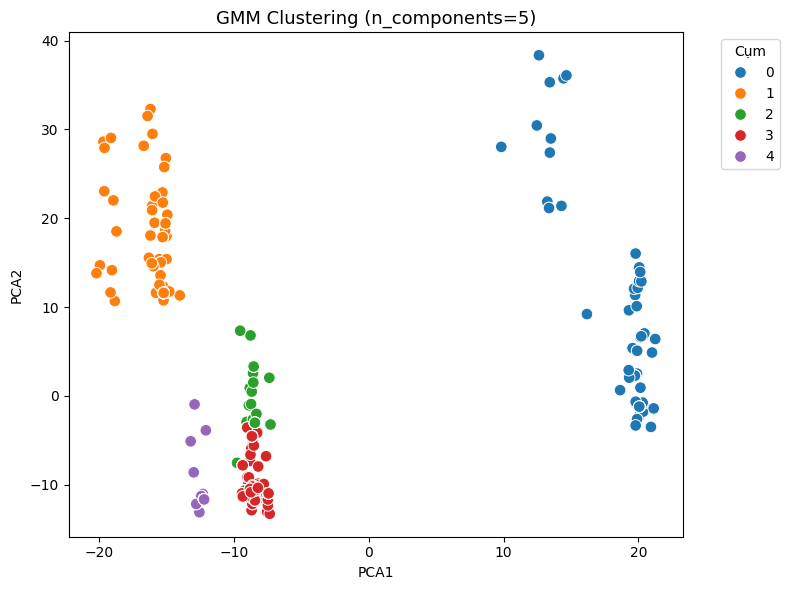

 Danh sách cụm GMM:
  ▪ Cụm 0 (247 nghệ sĩ): Bảo Anh, Chi Pu, Chí Tài, Cát Phượng, Don Nguyễn, Duy Khánh, Hari Won, Hoài Linh, Hòa Minzy, Hồ Quang Hiếu...
  ▪ Cụm 1 (135 nghệ sĩ): Anh Thư, Anh Đức, Cris Phan, Diệu Nhi, Hoàng Yến Chibi, Huỳnh Lập, Hùng Thuận, Hồ Vĩnh Khoa, Hữu Long, Jun Phạm...
  ▪ Cụm 2 (46 nghệ sĩ): Angela Phương Trinh, Hen Niê, Hoàng Sơn, Hoàng Thùy, Huy Khánh, Huỳnh Đông, Hương Giang Idol, Hứa Vĩ Văn, Jennifer Phạm, Lê Hoàng...
  ▪ Cụm 3 (193 nghệ sĩ): Chí Anh, Dorbi Petrov, George Ganev, Georgi Dimov, Georgi Ganev, Hoàng My, Hồ Hoài Anh, Khánh My, Khánh Nam, Khánh Thi...
  ▪ Cụm 4 (54 nghệ sĩ): Khả Ngân, Ninh Dương Lan Ngọc, Mai Tài Phến, Nguyễn Anh Tú, Dương Hoàng Yến, Nguyễn Hương Giang, Nguyễn Việt Hoàng, Trần Quốc Thiên, Bob Nguyễn, Bùi Xuân Trường...


In [50]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import community as community_louvain
import matplotlib.pyplot as plt
import seaborn as sns


# === Chuẩn bị dữ liệu từ graph ===
artists = list(G.nodes())
C = pd.DataFrame(nx.to_numpy_array(G, nodelist=artists), index=artists, columns=artists)

# Chuẩn hoá dữ liệu
X = StandardScaler().fit_transform(C.values)

# === Phân cụm bằng GMM ===
n_components = 5  # bạn có thể điều chỉnh
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm_labels = gmm.fit_predict(X)

# === Tính các chỉ số đánh giá ===
sil_gmm = silhouette_score(X, gmm_labels)
partition_gmm = {a: int(l) for a, l in zip(artists, gmm_labels)}
mod_gmm = community_louvain.modularity(partition_gmm, G)

# Tính số cụm & kích thước
unique_clusters = sorted(set(gmm_labels))
n_clusters = len(unique_clusters)
cluster_sizes = [list(gmm_labels).count(cid) for cid in unique_clusters]
avg_size = np.mean(cluster_sizes)
min_size = np.min(cluster_sizes)
max_size = np.max(cluster_sizes)

# === In bảng đánh giá ===
print("KẾT QUẢ ĐÁNH GIÁ GMM TRÊN ĐỒ THỊ G")
print(f"   ▪ Thuật toán     : GMM")
print(f"   ▪ Số cụm          : {n_clusters}")
print(f"   ▪ Kích thước TB   : {avg_size:.2f}")
print(f"   ▪ Cụm nhỏ nhất    : {min_size}")
print(f"   ▪ Cụm lớn nhất    : {max_size}")
print(f"   ▪ Modularity      : {mod_gmm:.4f}")
print(f"   ▪ Silhouette      : {sil_gmm:.4f}")

# === Giảm chiều để vẽ trực quan ===
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
df_plot = pd.DataFrame({
    "Artist": artists,
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "GMM": gmm_labels
})

# === Vẽ biểu đồ cụm GMM ===
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_plot, x="PCA1", y="PCA2", hue="GMM", palette="tab10", s=70)
plt.title(f"GMM Clustering (n_components={n_components})", fontsize=13)
plt.legend(title="Cụm", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# === In chi tiết cụm ===
print(" Danh sách cụm GMM:")
for cid in sorted(set(gmm_labels)):
    members = df_plot.loc[df_plot["GMM"] == cid, "Artist"].tolist()
    print(f"  ▪ Cụm {cid} ({len(members)} nghệ sĩ): {', '.join(members[:10])}{'...' if len(members) > 10 else ''}")


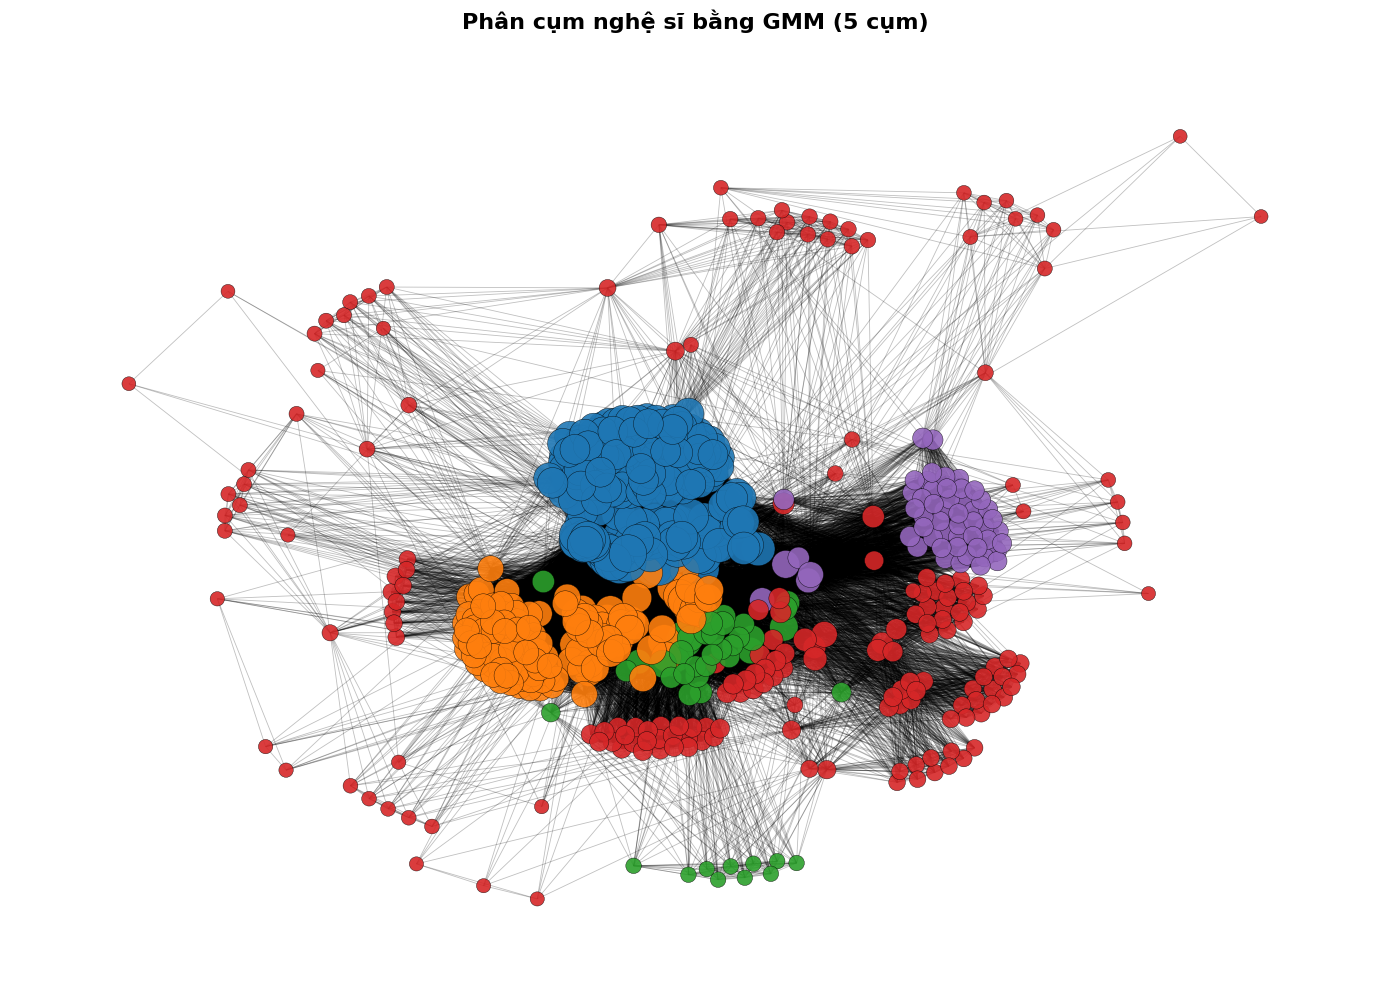

In [53]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np

# --- Gán nhãn cụm vào node ---
for artist, label in zip(artists, gmm_labels):
    G.nodes[artist]['cluster'] = label

# --- Thiết lập thông số vẽ ---
n_clusters = len(set(gmm_labels))
palette = sns.color_palette("tab10", n_clusters)
color_map = [palette[label % len(palette)] for label in gmm_labels]

# --- Tính độ trung tâm để chỉnh kích thước node ---
degree_dict = dict(G.degree())
sizes = np.array([degree_dict[n] for n in G.nodes()])
sizes = 100 + (sizes - sizes.min()) / (sizes.max() - sizes.min() + 1e-6) * 700  # node to nhỏ theo degree

# --- Bố cục đồ thị ---
pos = nx.spring_layout(G, k=0.25, seed=42)  # k nhỏ -> cụm dày, k lớn -> cụm tản

# --- Vẽ đồ thị ---
plt.figure(figsize=(14, 10))
nx.draw_networkx_edges(G, pos, alpha=0.25, width=0.6, edge_color="black")  # vẽ vạch đen

nx.draw_networkx_nodes(
    G, pos,
    node_color=color_map,
    node_size=sizes,
    alpha=0.9,
    linewidths=0.3,
    edgecolors="black"
)

plt.title(f"Phân cụm nghệ sĩ bằng GMM ({n_clusters} cụm)", fontsize=16, fontweight="bold", pad=20)
plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
def most_frequent_collab_group_gmm(G, artists, gmm_labels):
    """
    Xác định cụm GMM có mức độ hợp tác nội bộ mạnh nhất (tổng trọng số cạnh lớn nhất)
    """
    # Tạo partition từ GMM labels
    partition = {artist: int(label) for artist, label in zip(artists, gmm_labels)}

    # Gom node theo cụm
    clusters = {}
    for node, cid in partition.items():
        clusters.setdefault(cid, []).append(node)

    # Tính tổng trọng số các cạnh trong từng cụm
    intra_weights = {}
    for cid, members in clusters.items():
        subg = G.subgraph(members)
        total_weight = sum(
            d.get("weight", 1) for _, _, d in subg.edges(data=True)
        )  # nếu không có trọng số thì coi weight=1
        intra_weights[cid] = total_weight

    # Tổng trọng số toàn mạng
    total_graph_weight = sum(d.get("weight", 1) for _, _, d in G.edges(data=True))

    # Cụm mạnh nhất
    best_cid = max(intra_weights, key=intra_weights.get)
    best_members = clusters[best_cid]
    best_val = intra_weights[best_cid]
    perc = best_val / total_graph_weight * 100 if total_graph_weight > 0 else 0

    # In kết quả
    print(f"\n=== NHÓM HỢP TÁC THƯỜNG XUYÊN NHẤT (GMM) ===")
    print(f"- Cụm {best_cid} với {len(best_members)} nghệ sĩ")
    print(f"- Tổng số lần hợp tác nội bộ: {best_val} / {total_graph_weight} cạnh (≈ {perc:.2f}%)")
    print(f"- Danh sách nghệ sĩ trong cụm:")
    print(", ".join(best_members[:20]) + ("..." if len(best_members) > 20 else ""))

    return best_cid, best_members, best_val, perc

# Gọi hàm:
best_cid, best_members, best_val, perc = most_frequent_collab_group_gmm(G, artists, gmm_labels)



=== NHÓM HỢP TÁC THƯỜNG XUYÊN NHẤT (GMM) ===
- Cụm 0 với 247 nghệ sĩ
- Tổng số lần hợp tác nội bộ: 31490 / 58843 cạnh (≈ 53.52%)
- Danh sách nghệ sĩ trong cụm:
Bảo Anh, Chi Pu, Chí Tài, Cát Phượng, Don Nguyễn, Duy Khánh, Hari Won, Hoài Linh, Hòa Minzy, Hồ Quang Hiếu, Hồ Quỳnh Hương, Khởi My, Kim Tử Long, Lam Trường, Long Nhật, Lê Giang, Minh Khang, Minh Nhí, Miu Lê, Ngô Kiến Huy...


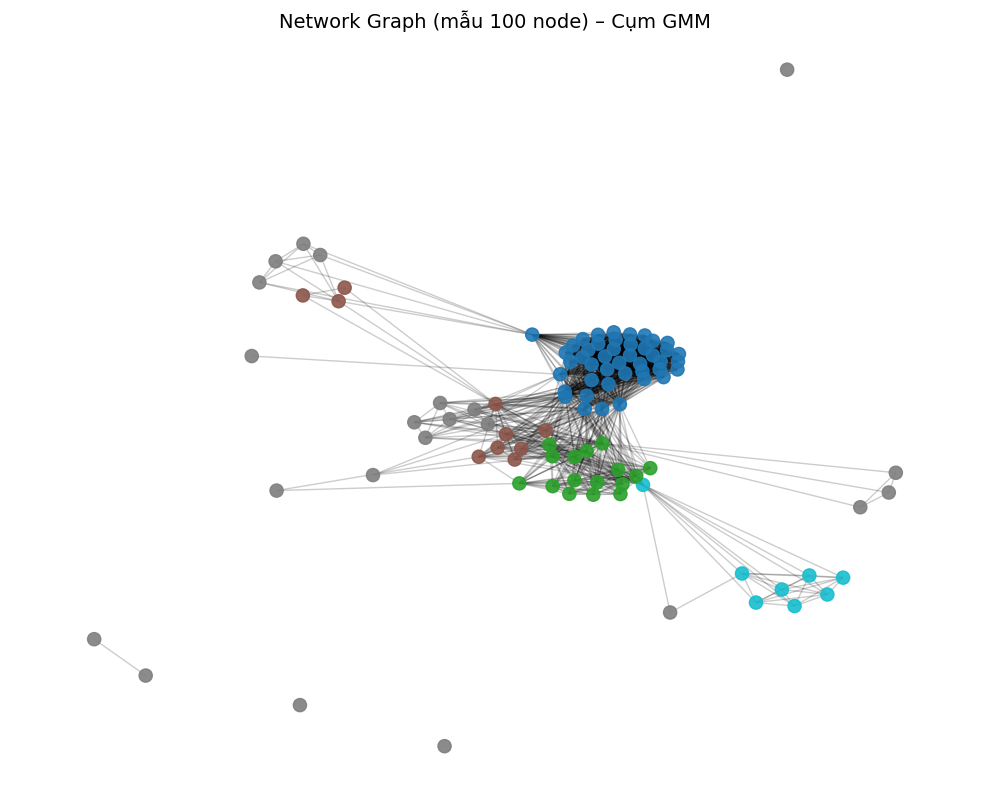

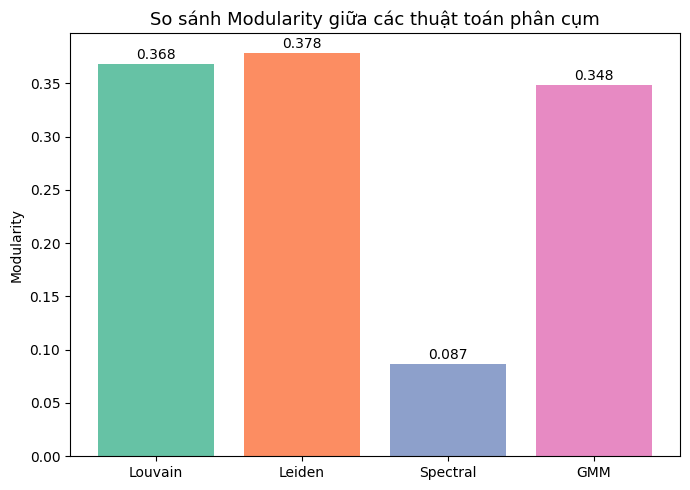

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
import random
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import spectral_embedding


A = nx.to_numpy_array(G, weight="weight")

for part in partitions:
    try:
        emb = spectral_embedding(A, n_components=min(10, len(G)-1), random_state=42)
        labels = np.array([part[n] for n in G.nodes()])
        sil = silhouette_score(emb, labels) if len(set(labels)) > 1 else np.nan
    except Exception:
        sil = np.nan
        emb = np.zeros((len(G), 2))
    sil_scores.append(sil)
    embeddings.append((emb, labels))


# === NETWORK GRAPH (mẫu 100 node cho GMM) ===
sample_nodes = random.sample(list(G.nodes()), min(100, len(G.nodes())))
subG = G.subgraph(sample_nodes)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subG, k=0.3, seed=42)
nx.draw_networkx_edges(subG, pos, alpha=0.2)
nx.draw_networkx_nodes(
    subG, pos,
    node_size=90,
    node_color=[partition_gmm[n] for n in subG.nodes()],
    cmap="tab10", alpha=0.9
)
plt.title("Network Graph (mẫu 100 node) – Cụm GMM", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


# ===MODULARITY DENSITY BAR CHART ===
mods = []
for part in partitions:
    mod = nx.algorithms.community.quality.modularity(G, [set(np.array(list(part.keys()))[np.array(list(part.values())) == i]) for i in set(part.values())], weight="weight")
    mods.append(mod)

fig, ax = plt.subplots(figsize=(7,5))
ax.bar(algos, mods, color=sns.color_palette("Set2"))
for i, v in enumerate(mods):
    ax.text(i, v + 0.005, f"{v:.3f}", ha="center", fontsize=10)
ax.set_ylabel("Modularity")
ax.set_title("So sánh Modularity giữa các thuật toán phân cụm", fontsize=13)
plt.tight_layout()
plt.show() 

